In [19]:
#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [20]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [21]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [23]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
#Replacement of Text classifiers to ordinal or binary for the following

for dataset in combine:
    dataset['Street'] = dataset['Street'].map({"Grvl": 0, "Pave":1})
    dataset['Alley'] = dataset['Alley'].map({'NA':0,'Grvl':1,'Pave':2})
    dataset['LotShape'] = dataset['LotShape'].map({'Reg':0,'IRl':1,'IR2':2,'IR3':3})
    dataset['LandContour'] = dataset['LandContour'].map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})
    dataset['Utilities'] = dataset['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSewa':2,'ELO':3})
    dataset['LotConfig'] = dataset['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
    dataset['LandSlope'] = dataset['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
    dataset['ExterQual'] = dataset['ExterQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
    dataset['ExterCond'] = dataset['ExterCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
    dataset['BsmtQual'] = dataset['BsmtQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
    dataset['BsmtCond'] = dataset['BsmtCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
    dataset['BsmtExposure'] = dataset['BsmtExposure'].map({'Gd':0,'Av':1,'Mn':2,'No':3,'NA':4})
    dataset['BsmtFinType1'] = dataset['BsmtFinType1'].map({'GLQ':0,'ALQ':1,'BLG':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6})
    dataset['BsmtFinType2'] = dataset['BsmtFinType2'].map({'GLQ':0,'ALQ':1,'BLG':2,'Rec':3,'LwQ':4,'Unf':5,'NA':6})
    dataset['Heating'] = dataset['Heating'].map({'Floor':0,'GasA':1,'GasW':2,'Grav':3,'OthW':4,'Wall':5})
    dataset['HeatingQC'] = dataset['HeatingQC'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Pa':4})
    dataset['CentralAir'] = dataset['CentralAir'].map({'N':0,'Y':1})
    dataset['Electrical'] = dataset['Electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2,'FuseP':3,'Mix':4})
    dataset['KitchenQual'] = dataset['KitchenQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
    dataset['Functional'] = dataset['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
    dataset['KitchenQual'] = dataset['KitchenQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4})
    dataset['Functional'] = dataset['Functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
    dataset['FireplaceQu']=dataset['FireplaceQu'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
    dataset['GarageType']=dataset['GarageType'].map({'2Types':0,'Attchd':1,'Basment':2,'BuiltIn':3,'CarPort':4,'Detchd':5,'NA':6})
    dataset['GarageFinish']=dataset['GarageFinish'].map({'Fin':0,'RFn':1,'Unf':2,'NA':3})
    dataset['GarageQual']=dataset['GarageQual'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
    dataset['GarageCond']=dataset['GarageCond'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'Po':4,'NA':5})
    dataset['PavedDrive']=dataset['PavedDrive'].map({'Y':0,'P':1,'N':2})
    dataset['PoolQC']=dataset['PoolQC'].map({'Ex':0,'Gd':1,'TA':2,'Fa':3,'NA':4})
    dataset['Fence']=dataset['Fence'].map({'GdPrv':0,'MnPrv':1,'GdWo':2,'MnWw':3,'NA':4})
    dataset['MiscFeature']=dataset['MiscFeature'].map({'Elev':0,'Gar2':1,'Othr':2,'Shed':3,'TenC':4,'NA':5})
    dataset['SaleType']=dataset['SaleType'].map({'WD':0,'CWD':1,'VWD':2,'New':3,'COD':4,'Con':5,'ConLw':6,'ConLI':7,'ConLD':8,'Oth':9})
    dataset['SaleCondition']=dataset['SaleCondition'].map({'Normal':0,'Abnorml':1,'AdjLand':2,'Alloca':3,'Family':4,'Partial':5})
    
    
    
    



In [25]:
#Replacement of Text classifiers to ordinal or binary for the following
for dataset in combine: 
    dataset['HasPool']=dataset['PoolArea'] 
    dataset['HasBasement'] = dataset['TotalBsmtSF'] 
    dataset['Has2ndFl'] = dataset['2ndFlrSF']
for dataset in combine: 
    dataset.loc[dataset.HasPool>0,'HasPool']=1 
    dataset.loc[dataset.HasBasement>0,'HasBasement']=1
    dataset.loc[dataset.Has2ndFl>0,'Has2ndFl']=1

In [26]:

#New Simple Features with Addition of Multiple Feidsd
for dataset in combine: 
    dataset['totalRoomPlusBaths']=dataset['BsmtFullBath']+ dataset['BsmtHalfBath']\
    +dataset['FullBath']+dataset['HalfBath']

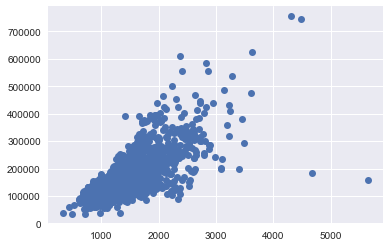

In [27]:
#Initial Visualizations

plt.plot(train_df['GrLivArea'],train_df['SalePrice'],'o')
#Definitely an upper limit on price per squarefoot that the market is willing to pay

In [28]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasPool,HasBasement,Has2ndFl,totalRoomPlusBaths
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,91.000000,976.000000,1460.000000,1459.0,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,0.995890,1.450549,0.114754,0.185616,0.0,0.416438,...,43.489041,6.321918,2007.815753,0.490411,0.582192,180921.195890,0.004795,0.974658,0.432192,2.430822
std,421.610009,42.300571,24.284752,9981.264932,0.063996,0.500305,0.497324,0.606509,0.0,0.773448,...,496.123024,2.703626,1.328095,1.368616,1.475209,79442.502883,0.069100,0.157217,0.495550,0.922647
min,1.000000,20.000000,21.000000,1300.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,1.000000
25%,365.750000,20.000000,59.000000,7553.500000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,5.000000,2007.000000,0.000000,0.000000,129975.000000,0.000000,1.000000,0.000000,2.000000
50%,730.500000,50.000000,69.000000,9478.500000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,6.000000,2008.000000,0.000000,0.000000,163000.000000,0.000000,1.000000,0.000000,2.000000
75%,1095.250000,70.000000,80.000000,11601.500000,1.000000,2.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,8.000000,2009.000000,0.000000,0.000000,214000.000000,0.000000,1.000000,1.000000,3.000000
max,1460.000000,190.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,0.0,4.000000,...,15500.000000,12.000000,2010.000000,9.000000,5.000000,755000.000000,1.000000,1.000000,1.000000,6.000000


In [29]:
X_train = train_df.drop(['MSZoning','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st', 'Exterior2nd','MasVnrType','Foundation','SalePrice'],axis=1)
Y_train = train_df['SalePrice']

X_train.fillna(value=0,inplace=True)

In [30]:
random_forest = RandomForestClassifier(n_estimators=8)
random_forest.fit(X_train, Y_train)
#Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.040000000000006

In [31]:
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
acc_lin = round(linreg.score(X_train,Y_train)*100,2)
acc_lin

coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(linreg.coef_[:])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Alley,1.880241e+04
11,OverallCond,1.312810e+04
69,Has2ndFl,1.078124e+04
44,FireplaceQu,9.342627e+03
49,GarageArea,9.104740e+03
52,PavedDrive,6.231613e+03
12,YearBuilt,5.574822e+03
42,Functional,4.447955e+03
17,BsmtQual,4.217865e+03
37,HalfBath,2.484676e+03


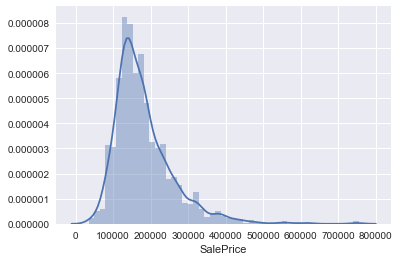

In [32]:
#Investigation
sns.distplot(train_df['SalePrice'])

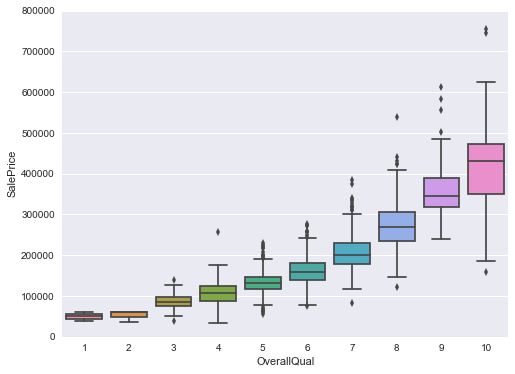

In [33]:
#Box Plot of Overall Quality/SalePrice
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

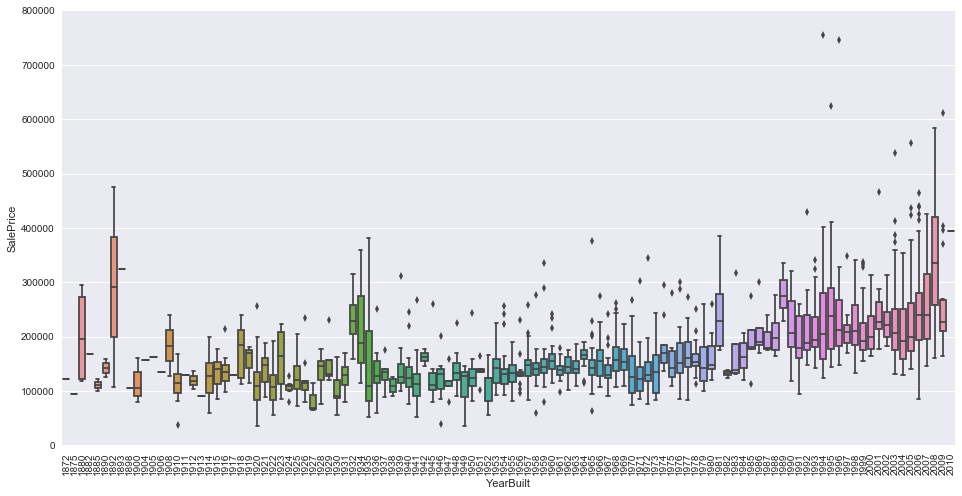

In [35]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

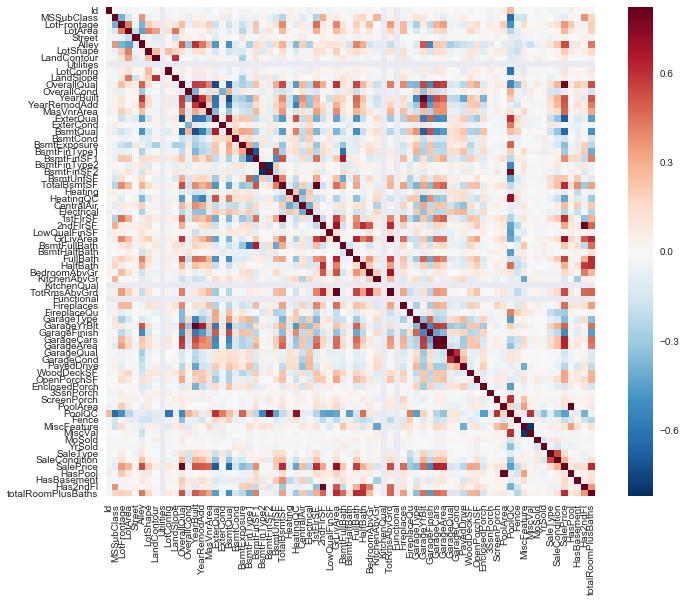

In [39]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

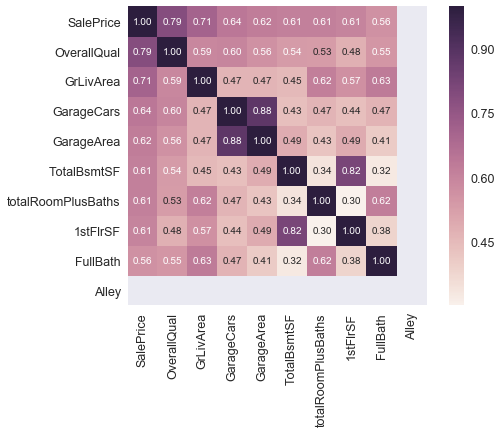

In [40]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


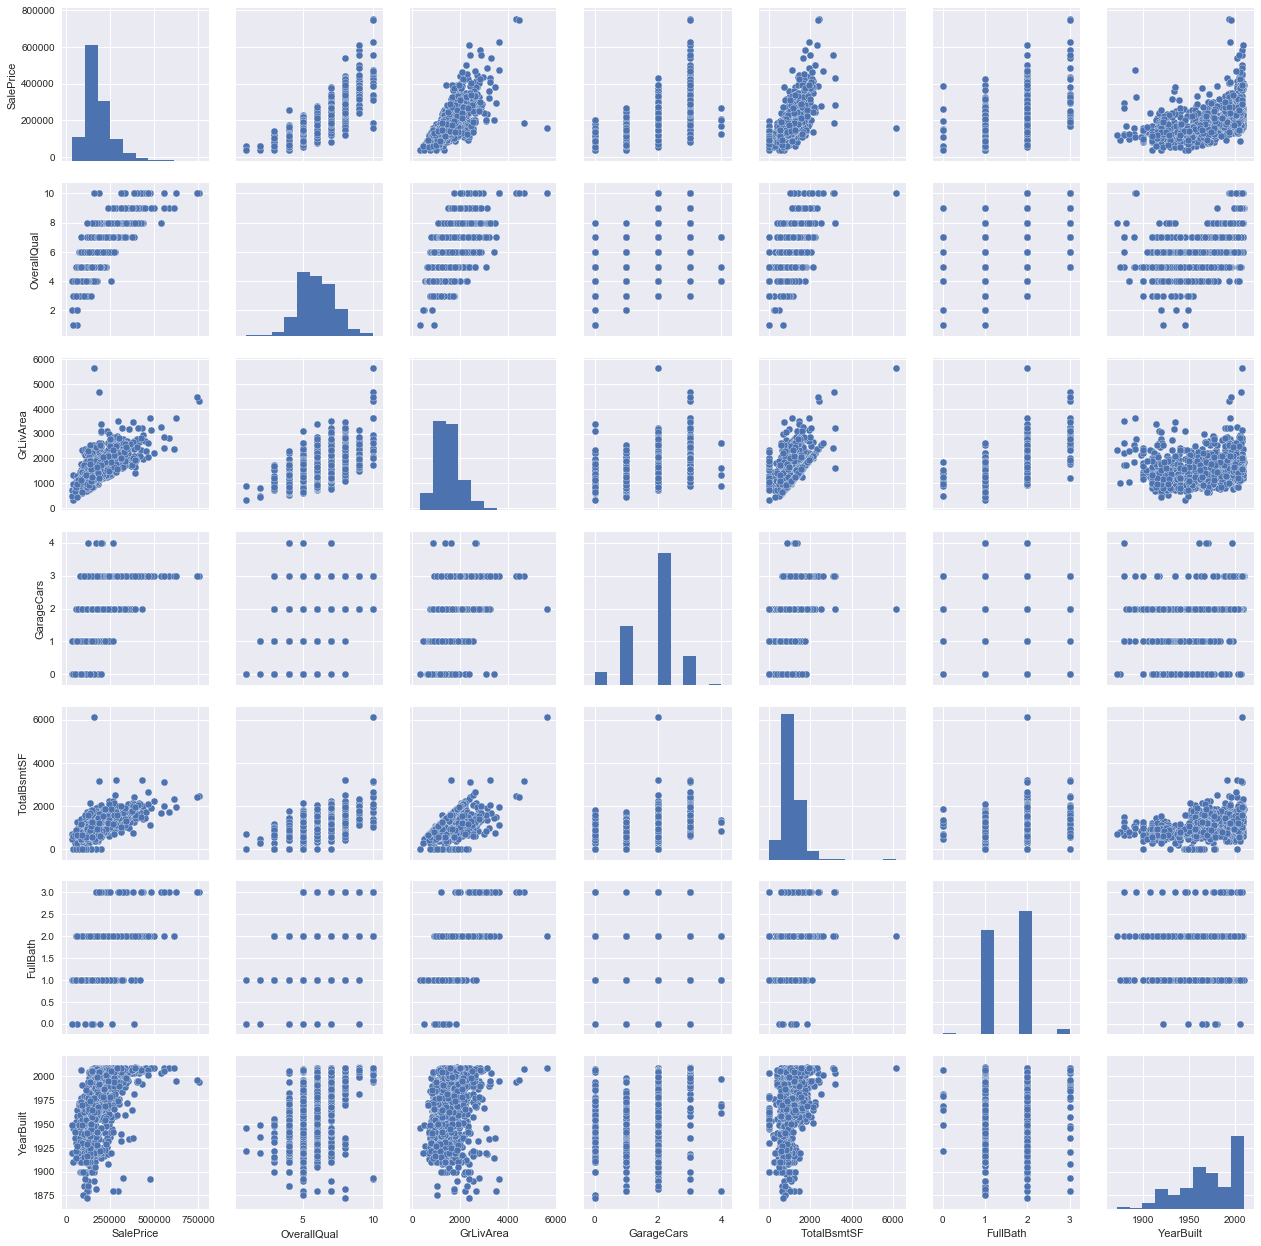

In [41]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();